# Spectral Methods. 2D Swift-Hohenberg Equation#

Here we are going to solve numerically the 2D Generalized Swift-Hohenberg Equation:

$$
\partial_t u=r u-(\nabla^2+1)^2 u - u^3
$$

using Spectral Methods. 

** Solve the equation in a square domain using Spectral Methods for $r=0.3$ and random initial conditions. By choosing the appropriate number of grid points, space and time steps, you should get a pattern similar to this one:**

<img src="Stripes_01.png" width="200">

** Note - Simulations in this homework may be a bit long. **

In [10]:
# Loading some modules
import numpy as np
import matplotlib.pylab as plt
from numpy.fft import fft2,ifft2,fftfreq,fftshift
%matplotlib inline

In [33]:
# General function that will be called for the required initial conditions and the proper times of integration.
def SH2D(ksx,ksy,init_u,r,T):
    
    # Initial conditions
    u = init_u
    
    # Tables for saving time
    kmesh = (1-ksx**2-ksy**2)**2
    
    # Set the time step and the times for the simulation
    dt = 0.0001
    tmin = 0; tmax = T; ts = np.arange(tmin,tmax+dt,dt);
    
    # Plotting facilities
    p=1; plt.figure(figsize=(22,14));
    plt.subplot(2,3,1)
    plt.imshow(u, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
    plt.xlabel('y', fontsize=18); plt.ylabel('x', fontsize=18); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=18) 
    plt.title('t=' + str(0), fontsize=18); plt.tick_params(labelsize=18);
    
    # Loop in time
    for it,t in enumerate(ts[1:]):
        u0 = np.copy(u)
        u = u0 + dt*(r*u0 - ifft2(kmesh*fft2(u0)) -u0**3)
        u = u.real
        
        # Plot some of the intermediate steps in order to see the evolution
        if it==int(0.2*T/dt)-1 or it==int(0.4*T/dt)-1 or it==int(0.6*T/dt)-1 or it==int(0.8*T/dt)-1 or it==int(1.0*T/dt)-1:
            p += 1
            plt.subplot(2,3,p)
            plt.imshow(u, cmap='jet', interpolation='none', extent=[xmin,xmax,ymax,ymin])
            plt.xlabel('y', fontsize=18); plt.ylabel('x', fontsize=18); cbar=plt.colorbar(); cbar.ax.tick_params(labelsize=18) 
            plt.title('t=' + str(t), fontsize=18); plt.tick_params(labelsize=18);

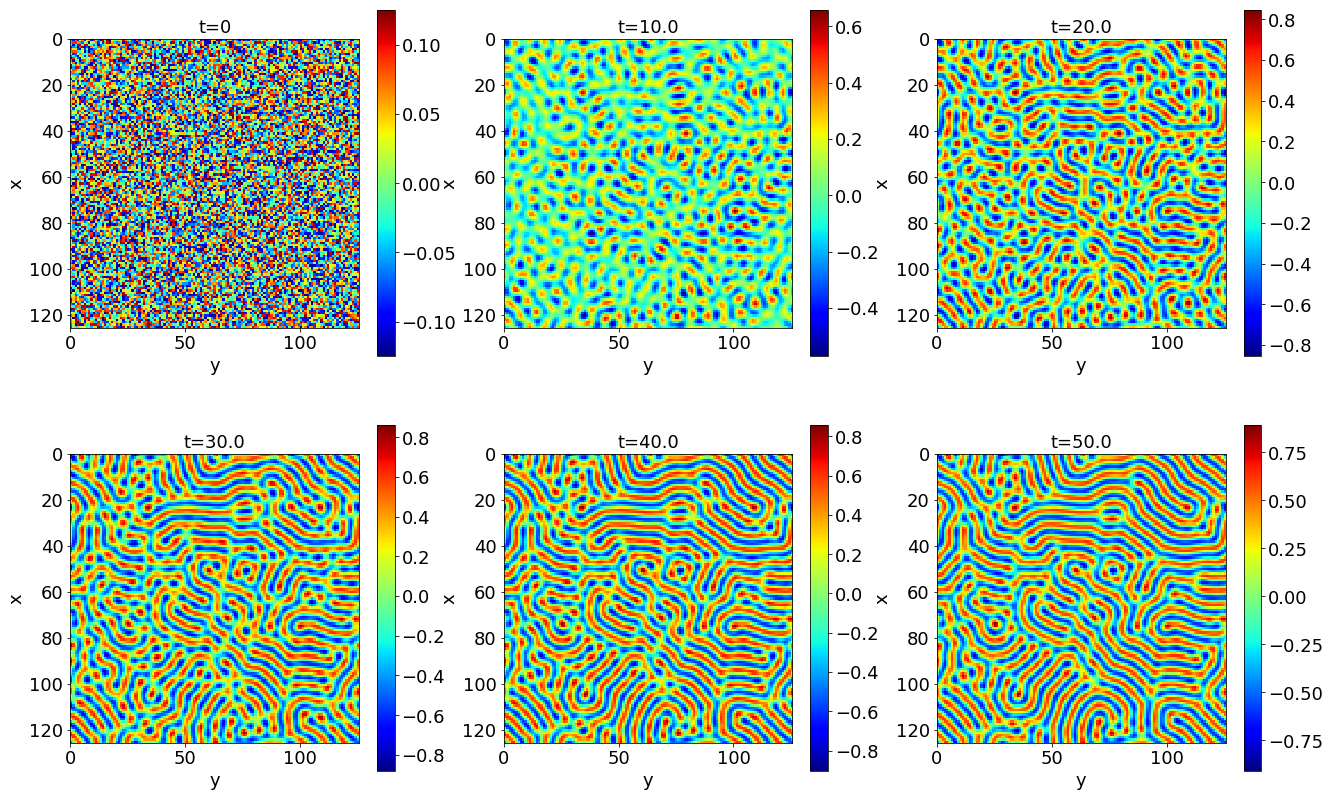

In [34]:
# Random initial conditions

# Define simulation parameters for the x coordinate
kx = 0.5; wavelength_x = 2*np.pi/kx; number_wavelengths_x = 10
xmin = 0; xmax = number_wavelengths_x*wavelength_x; dx = 1.0
# Generate a mesh for positions x
x = np.arange(xmin,xmax+dx,dx); Nx = len(x)
    
# Define simulation parameters for the y coordinate
ky = 0.5; wavelength_y = 2*np.pi/ky; number_wavelengths_y = 10
ymin = 0; ymax = number_wavelengths_y*wavelength_y; dy = 1.0
# Generate a mesh for positions y
y = np.arange(ymin,ymax+dy,dy); Ny = len(y)
    
# Compute the wavenumbers that define the Fourier basis
k = 2*np.pi*fftfreq(Nx,dx)
ksx, ksy = np.meshgrid(k,k)

# Simulate
r = 0.3
init_u = 0.25*(np.random.rand(Nx,Ny)-0.5)
T = 50
SH2D(ksx,ksy,init_u,r,T)

## Zigzag Instability ##

** Consider the evolution in time of a system where $r=0.3$. The initial conditions are defined by a sinusoidal modulation with $k_x=0.88357$ plus a random contribution. After some evolution, you should get a pattern with Zigzag shape. Show the evolution to this final pattern. Why this evolution cannot be explained only considering the linear terms of the Equation? **

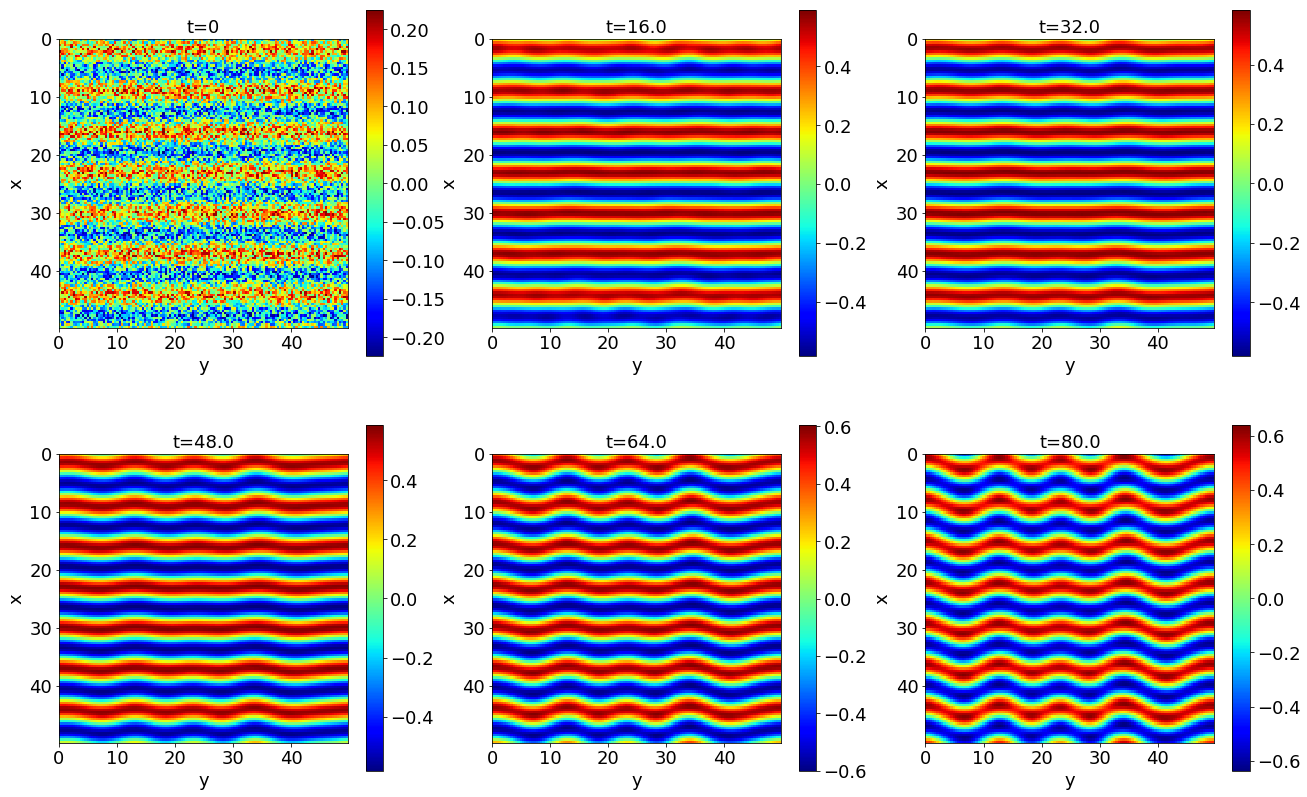

In [38]:
# Zigzag Instability

# Define simulation parameters for the x coordinate
kx = 0.88357; wavelength_x = 2*np.pi/kx; number_wavelengths_x = 7
xmin = 0; xmax = number_wavelengths_x*wavelength_x; dx = 0.40
# Generate a mesh for positions x
x = np.arange(xmin,xmax+dx,dx); Nx = len(x)
    
# Define simulation parameters for the y coordinate
ky = 0.88357; wavelength_y = 2*np.pi/ky; number_wavelengths_y = 7
ymin = 0; ymax = number_wavelengths_y*wavelength_y; dy = 0.40
# Generate a mesh for positions y
y = np.arange(ymin,ymax+dy,dy); Ny = len(y)
    
# Compute the wavenumbers that define the Fourier basis
k = 2*np.pi*fftfreq(Nx,dx)
ksx, ksy = np.meshgrid(k,k)

# Simulate
r = 0.3
ymesh,xmesh = np.meshgrid(x,x)
init_u = 0.1*np.sin(kx*xmesh) + 0.25*(np.random.rand(Nx,Ny)-0.5)
T = 80
SH2D(ksx,ksy,init_u,r,T)

If only linear terms were to be considered, then the evolution would naturally tend to exponentially grow. By adding the nonlinear term $-u^3$, these dynamics are modified such that the amplitudes saturate. This way, the perturbations can be written as

\begin{equation*}
u(x,y,t)=\left[A(x,y,t)\ u_0\ e^{iq_0x}+c.c.\right]+O(\epsilon)
\end{equation*}

Where $u_0$ corresponds the saturated wave, being $A(x,y,t)$ the modulation.

All in all, the pattern in the final state is possible due to the nonlinearity of the equation. Otherwise, the exponential growth would have made the initial perturbation grow towards infinity and no pattern would have shown up.

## Eckhaus instability ##

** Finally, consider, again, the evolution in time of a system where $r=0.3$. The initial conditions are defined by a sinusoidal modulation with $k_x=1.178$ plus a random contribution. After some evolution in time, you should get a pattern different to the initial one. What is the main difference between these two patterns? Hint: Check the number of wavelengths at the begining and at the end of the simulation. Is this evolution possible for a linear system? **

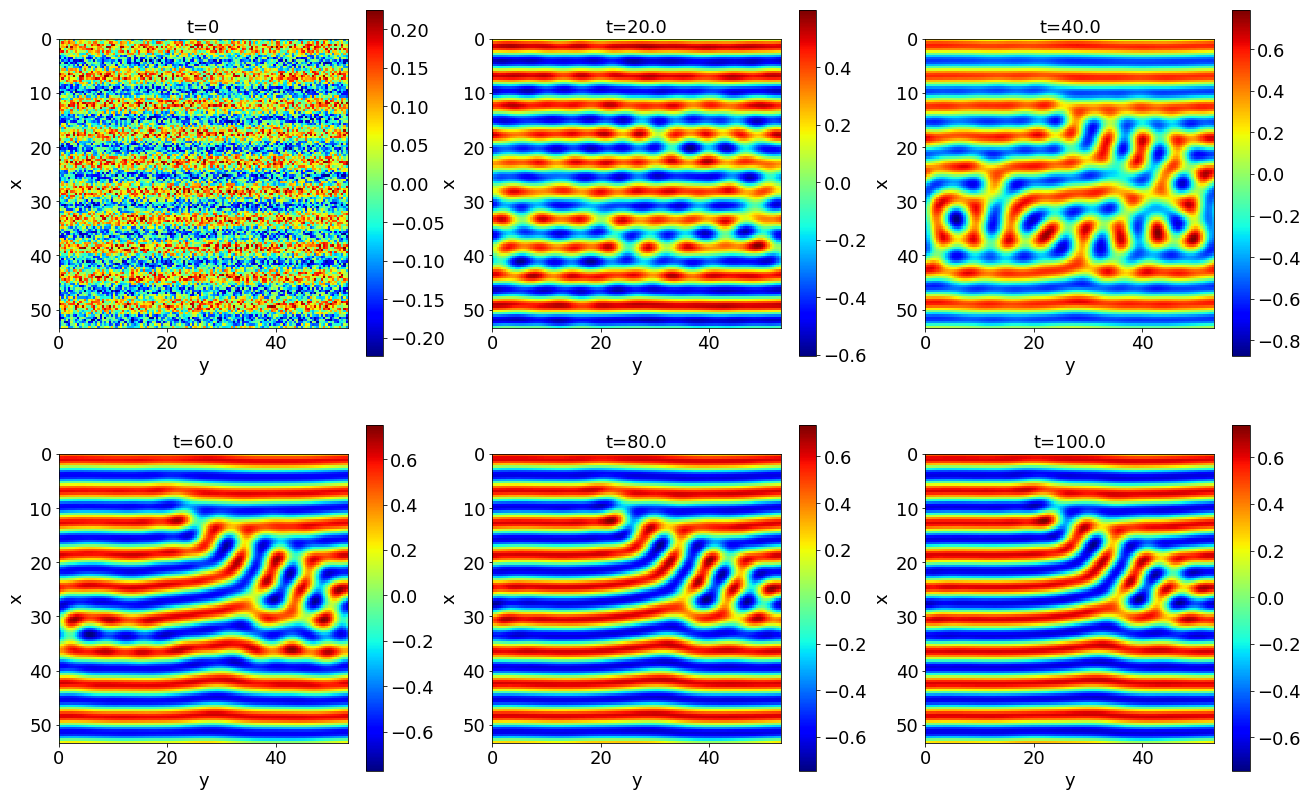

In [39]:
# Eckhaus Instability

# Define simulation parameters for the x coordinate
kx = 1.178; wavelength_x = 2*np.pi/kx; number_wavelengths_x = 10
xmin = 0; xmax = number_wavelengths_x*wavelength_x; dx = 0.42
# Generate a mesh for positions x
x = np.arange(xmin,xmax+dx,dx); Nx = len(x)
    
# Define simulation parameters for the y coordinate
ky = 1.178; wavelength_y = 2*np.pi/ky; number_wavelengths_y = 10
ymin = 0; ymax = number_wavelengths_y*wavelength_y; dy = 0.42
# Generate a mesh for positions y
y = np.arange(ymin,ymax+dy,dy); Ny = len(y)
    
# Compute the wavenumbers that define the Fourier basis
k = 2*np.pi*fftfreq(Nx,dx)
ksx, ksy = np.meshgrid(k,k)

# Simulate
r = 0.3
ymesh,xmesh = np.meshgrid(x,x)
init_u = 0.1*np.sin(kx*xmesh) + 0.25*(np.random.rand(Nx,Ny)-0.5)
T = 100
SH2D(ksx,ksy,init_u,r,T)

On the one hand, the initial number of red stripes (number of wavelengths) is 10, as it is defined in the initial conditions and as it can be seen in the picture for $t=0$, being roughly maintained until $t=20$. On the other hand, although the 2 uppermost and the 2 lowermost stripes remain the same, at $t=40$ the number of intermediate stripes starts to change from initially 6 to finally 5, remaining this way until the final time of simulation $t=100$. Note that some of the stripes are somehow distorted. All in all, it must be stressed that one couple of intermediate stripes have merged during the evolution of the system.

Similarly to the Zigzag case, in this Eckhaus case the evolution also goes towards a saturated state, without any divergences being observed during the process of simulation. Hence this bounded evolution would not be possible for a linear system, since a linear system would increase unboundedly in exponential form.

To sum up, nonlinearities are very important in the field of patterns. Thanks to them, many nice patterns can be modeled, as the Zigzag and the Eckhaus ones.